# MLG / Introduction to jupyter notebooks

In this laboratory you are going to learn how to perform interactive computing using **jupyter**. The **jupyter** project, born out of the IPython Project in 2014, evolved to support interactive data science and scientific computing across all programming languages. It was initially an interactive shell for python that has more functionnalities than the basic one, now it allows you to interact with your scripts using so called **notebooks**. The notebook extends the console-based approach to interactive computing in a qualitatively new direction, providing a web-based application suitable for capturing the whole computation process: developing, documenting, and executing code, as well as communicating the results.

This guide does not start from the basics of the general purpose language **python**. If you do not know this language, it is recommended to follow a **python** tutorial in order to learn the basic concepts and commands. You can have a look at the [official python tutorial](https://docs.python.org/2/tutorial/) or [Google's python tutorial](https://developers.google.com/edu/python/) for example.

Note that for this course, we will use the Python 3.X series.

You will use a browser-based notebook to interactively explore a dataset by:
- Reading raw data from ascii files
- Reading typed data (data frames) from ascii files
- Selecting specific columns and/or rows from a dataset
- Filtering datasets
- Plotting the information in the dataset (e.g., scatter-plot, boxplot, histogram)

## 1. Using the notebooks

You are in an jupyter notebook right now. A jupyter notebook is a web interface to a python interpreter.

A notebook is made of cells. Each cell has a type which defines what happens when it is run. 

- Markdown cells allow you to write [Markdown](http://daringfireball.net/projects/markdown/) text in them. They are just displayed as HTML when run.
- Code cells contain python code. When the cell is run, the code is sent to the python interpreter, executed and you get the result in the cell output.
- Various header cells that allow you to structure your document.

You can change the type of a cell using the drop-down menu in the toolbar.

You can click (for Code cells) or double-click (for headers and markdown cells) on cells to edit their content. You can then use keyboard shortcuts to run them :

- Ctrl + Enter : run in place
- Shift + Enter : run and move to next cell
- Alt + Enter : run and insert new cell after

In [1]:
# This is a code cell containing python code !
print( 2 + 2 )

4


The python interpreter that executes the code you write in the notebook is called a *Kernel*. You can restart the kernel (the interpreter) using the *Kernel* menu. This is useful if you want to delete all your variables.

Jupyter has also "magic" functions that start with % . They allow you to do a lot of useful things with your ipython environment :

http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb

The %who magic gives you a list of the defined python variables. object? can be used to get documentation about an object :

In [2]:
a = 2
%who

a	 


## 2. Scientific computing with Python

In [3]:
def my_documented_function(a):
    '''
    This is a revolutionary function that returns a + 1
    '''
    return a + 1

print(my_documented_function(2))
print('This is the traditional python help() function :\n')
help(my_documented_function)

3
This is the traditional python help() function :

Help on function my_documented_function in module __main__:

my_documented_function(a)
    This is a revolutionary function that returns a + 1



In [4]:
# We can access the same info with just ? (note that you have to run this cell to view the effect)
my_documented_function?

Python has a number of packages (libraries) dedicated to scientific programming :

The foundation is [numpy](http://www.numpy.org/) which provides a N-dimensional array implementation with a nice indexing syntax (similar to MATLAB).

Then comes [scipy](http://www.scipy.org/) which contains a number of algorithms (signal processing, distance computation, etc...) built on top of numpy.

[matplotlib](http://matplotlib.org/) is a library to create 2D plots.

[pandas](http://pandas.pydata.org/) provides a DataFrame implementation, which is a layer on top of numpy arrays that makes some things (handling missing values, date indexing) easier. Heavily inspired by the [R](http://www.r-project.org/) statistical computing language.

[scikit-learn](http://scikit-learn.org/stable/) is a machine learning library that contains implementations of many of the most popular machine learning algorithms.

[keras](https://keras.io/) and [tensorflow](http://www.tensorflow.org) allow you to write programs that are compiled and can run on a GPU.

Finally, this is not a python package, but [stackoverflow](http://stackoverflow.com/) is a really good questions and answers platform where you can probably find answers to the most common problems you'll have :-)

If you want to install a scientific python environment on your machines, we suggest the use of [anaconda](https://store.continuum.io/cshop/anaconda/). It is a "python distribution" that comes with a package manager (conda) and all of the scientific packages listed above (and many others) pre-installed. We strongly recommend to use the [miniconda](https://docs.conda.io/en/latest/miniconda.html) variant, which install only the basic packages and the package manager (conda) while consuming less space in your machine.

## 3. Quick numpy introduction

Numpy allows you to define [multidimensionnal arrays](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) (recommended reading).

In [5]:
# Makes the numpy function available as np.<funcname> (np is a convention)
import numpy as np

array1 = np.array([
    [1, 2, 3],
    [4, 5, 6]]
)

print(array1.shape)

# The last line of a python cell is evaluated and used as the output for the cell
array1

(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

The array elements can be accessed using the [indexing syntax](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#arrays-indexing) (recommended reading). Numpy (and python) uses 0-based indexing.

In [6]:
print("element (2,3) : ", array1[1,2])
print("first row     : ", array1[0,:])
print("second column : ", array1[:,1])
print("second and third element of the second row : ", array1[1, 1:])

element (2,3) :  6
first row     :  [1 2 3]
second column :  [2 5]
second and third element of the second row :  [5 6]


You can do a [lot of things](http://docs.scipy.org/doc/numpy/reference/) with numpy arrays. For example, we can compute the mean of each row :

In [7]:
array1.mean(axis=1)

array([2., 5.])

We can also sort an array :

In [8]:
array2 = np.array([5, 8, 2, 9, 4, 3])
print("original\t :\t", array2)


print("using argsort\t :\t", array2[np.argsort(array2)]) # the fancy indexing version

array2.sort() # note that this does in-place sorting, so it *modifies* array2
print("after sort()\t :\t", array2)


original	 :	 [5 8 2 9 4 3]
using argsort	 :	 [2 3 4 5 8 9]
after sort()	 :	 [2 3 4 5 8 9]


And we can randomly shuffle an array:

In [9]:
np.random.shuffle(array2)

print(array2)

print("the max value is at position:", np.argmax(array2))

[9 3 8 5 4 2]
the max value is at position: 0


We can also use comparison operators on arrays, giving us a boolean mask. And then use the mask to index the array :

In [10]:
mask = (array1 > 2) & (array1 < 5)
print(array1)
print(mask)
print(array1[mask])


[[1 2 3]
 [4 5 6]]
[[False False  True]
 [ True False False]]
[3 4]


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Exercises</p>

As exercises, do the following :

- Compute the max of each row of array1
- Compute the max of each column of array1
- Print the elements of array1 that are less than 4 (without using a loop)
- Convert the range of the values in array2 to [0,1]

In [11]:


print(np.amax(array1, axis=1))
print(np.amax(array1, axis=0))
mask = (array1 < 4)
print(array1[mask])
print(np.interp(array2, (array2.min(), array2.max()), (0, 1)))




[3 6]
[4 5 6]
[1 2 3]
[1.         0.14285714 0.85714286 0.42857143 0.28571429 0.        ]


## 4. Loading a dataset with numpy 

### The Wine dataset

We will use the wine dataset from the UCI repository :
https://archive.ics.uci.edu/ml/datasets/Wine

The wine.data file is a simple CSV file, which we can be easily loaded as a numpy array with np.genfromtxt.

In [12]:
# Some nicer printing defaults for numpy arrays
np.set_printoptions(precision=5, suppress=True)

# Be careful to place the database in the right directory or adapt the path
data = np.genfromtxt('data/wine/wine.data', delimiter=',')
print(data.shape)
print(data)

(178, 14)
[[   1.     14.23    1.71 ...    1.04    3.92 1065.  ]
 [   1.     13.2     1.78 ...    1.05    3.4  1050.  ]
 [   1.     13.16    2.36 ...    1.03    3.17 1185.  ]
 ...
 [   3.     13.27    4.28 ...    0.59    1.56  835.  ]
 [   3.     13.17    2.59 ...    0.6     1.62  840.  ]
 [   3.     14.13    4.1  ...    0.61    1.6   560.  ]]


So this is a dataset with 178 samples and 14 dimensions for each sample. Let's have a look at the dataset description file (cat is a nice jupyter command that prints the content of a text file, like the unix cat)

In [13]:
%more data/wine/wine.names

In [14]:
# store the column names in an array
colnames = np.array([
    'class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 
    'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue',
    'OD280/OD315 of diluted wines', 'proline'
])
colnames.shape

(14,)

## 5. Quick introduction to Pandas

Ok, so now we have two numpy arrays. *data* contains our dataset and *colnames* the name of our columns. However, we would like to deal with only one data structure that can store both the data and the columns names. That's what pandas' DataFrame are for ! (or, but a bit less elegant, [numpy structured arrays](http://docs.scipy.org/doc/numpy/user/basics.rec.html)).

(Note that we could also directly load our CSV using pandas.read_csv)

In [15]:
import pandas as pd # pd is a convention too

df = pd.DataFrame(data=data[:,1:], columns=colnames[1:])
# Ensure the class column is an int
df['class'] = data[:,0].astype(np.int)

# Pandas dataframes have a nice pretty-printing for ipython notebooks
df

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,1
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,1
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,1
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,1


DataFrames have a nice <b>describe()</b> function that print some per-column statistics

In [16]:
df.describe()

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Exercise</p>

Describe in statistical terms the alcohol variable for each class of wine. E.g., use the describe() function of dataframes for each class of wine.

In [17]:
df.groupby(['class'])['alcohol'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
1,59.0,13.744746,0.462125,12.85,13.400,13.750,14.100,14.83
2,71.0,12.278732,0.537964,11.03,11.915,12.290,12.515,13.86
3,48.0,13.153750,0.530241,12.20,12.805,13.165,13.505,14.34


## 6. Visual exploratory analysis of data 

In statistics, exploratory data analysis (EDA) is an approach for analyzing datasets to summarize their main characteristics, often with visual methods.

For example, box and whisker plots use a graphical box: the bottom and top of the box are always the first (Q1) and third (Q3) quartiles, and the band inside the box is always the second quartile (the median). The whiskers are placed at Q1 - 1.5 IQR and Q3 + 1.5 IQR, where IQR means Inter-quartile range.
See [Boxplot definition at Wikipedia](https://en.wikipedia.org/wiki/Box_plot)

### Boxplots with matplotlib

In [18]:
from matplotlib import pyplot as pl # pylab is matplotlib
# The line below enables matplotlib-jupyter integration and allows plots to be displayed inline in the notebook.
%matplotlib inline

We want to see what the distribution of each feature is for each class. We'll use the [boxplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot) function of pylab/pyplot.

classes :  [1 2 3]


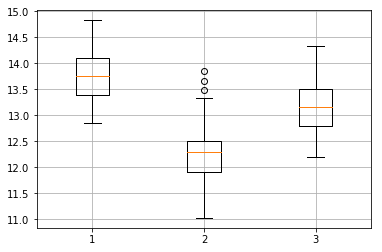

In [19]:
classes = np.unique(df['class'])
print('classes : ', classes)

alcohol_by_class = [df['alcohol'][df['class'] == c] for c in classes]

pl.boxplot(alcohol_by_class)
pl.grid()

dataframes have a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function that does per-class plotting with the *by* parameter :

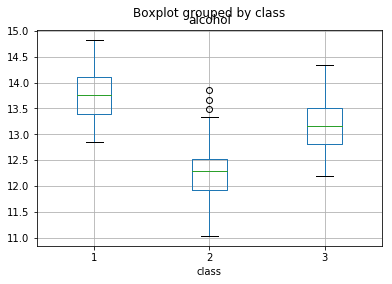

In [20]:
df.boxplot(column='alcohol', by='class');     # the ; at the end makes Python not to print the response of boxplot

We can do that for each column

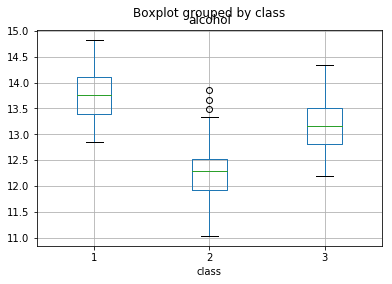

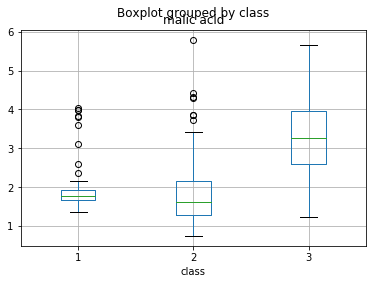

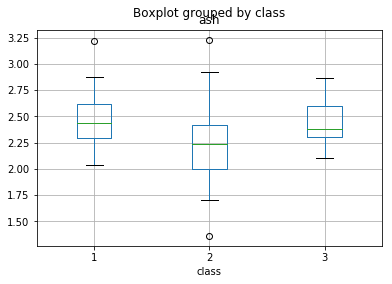

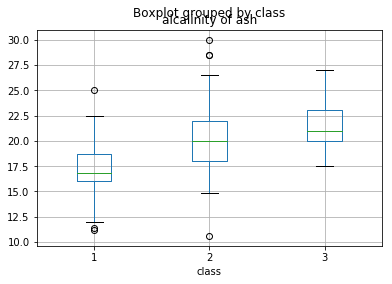

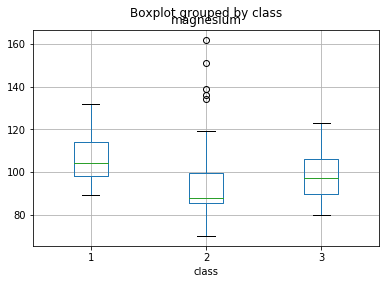

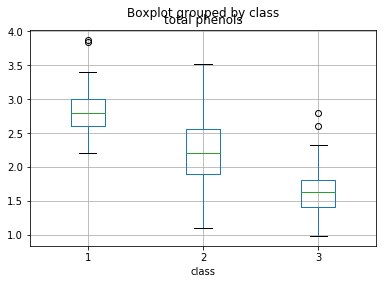

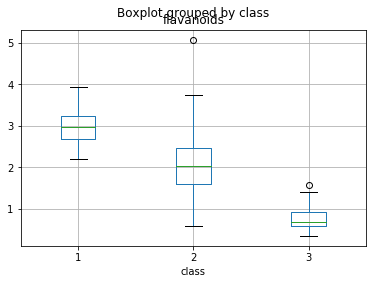

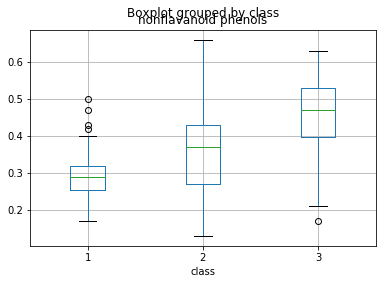

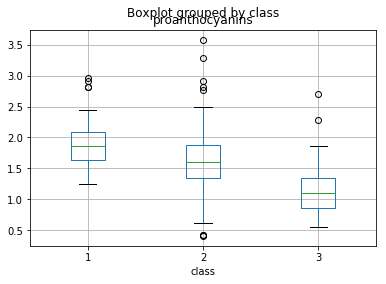

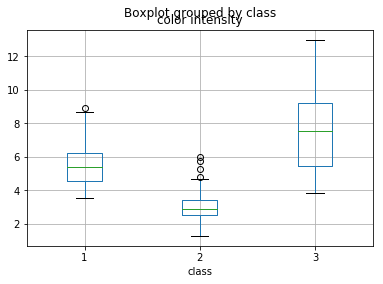

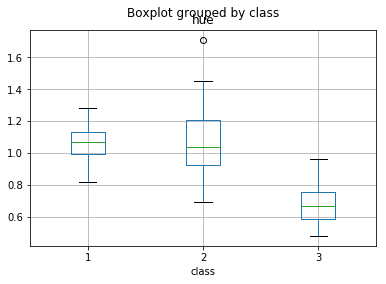

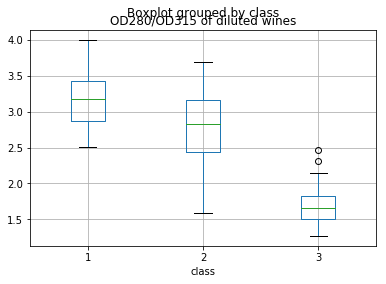

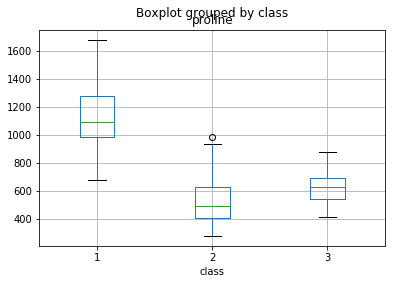

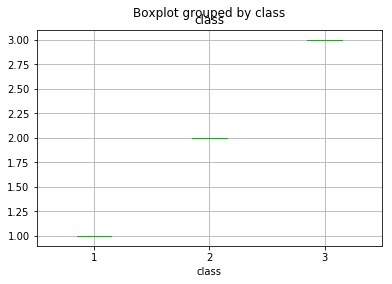

In [21]:
for c in df.columns:
    df.boxplot(column=c, by='class')

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: By looking at the boxplot, which features seem the most discriminative ? (which variables would be helpful to separate the wine classes?)</p>

alcohol, total phenols, flavanoids, 

## 7. Classifying the wine data

Let's first try a rule-based approach to classify the wine data.

Suppose that the <b>alcohol</b> variable allows for a good classification and by observing the corresponding boxplot, let's define the rules that associate a class to alcohol range values.

In [22]:
pred = []

for row in df['alcohol']:
    if row > 13.5:
        pred.append(1);
    elif row > 12.75 and row < 13.5 :
        pred.append(2);    
    else:
        pred.append(3)

# A new column is added to the dataframe
df['prediction'] = pred

In [23]:
df

,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,proline,class,prediction
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,1,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,1,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,1,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,1,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,1,2
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,1,1
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,1,1
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,1,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,1,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,1,1


<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Can you estimate the performance of such a classification method ?</p>

<b>Hint:</b> Divide the number of times the prediction value corresponds to the real one (e.g., how many times, class == prediction ?), by the total number of observations.  

In [24]:
mask = (df['class'] == df['prediction'])

len(df[mask])/len(df)

0.33707865168539325

Les performances sont assez mauvaises, une prédiction sur 3 est juste

## 8. Performance evaluation

#### Confusion matrix, precision, recall and F-score

A <b>confusion matrix</b> is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In the confusion matrix all correct guesses are located in the diagonal of the table, so it's easy to visually inspect the table for errors, as they will be represented by values outside the diagonal.

For an example, please see the Wikipedia page: https://en.wikipedia.org/wiki/Confusion_matrix

Behind the confusion matrix are the following concepts:

<b>true positives (TP)</b>: These are cases in which we predicted correctly the positive class (e.g. the person has a disease and has been diagnosed as sick).

<b>true negatives (TN):</b> We correctly predicted the negative class (e.g. the person is healthy and has not been diagnosed as sick).

<b>false positives (FP):</b> We wrongly predicted the positive class (e.g. the person don't actually have the disease but has been diagnosed as sick). (Also known as a "Type I error.")

<b>false negatives (FN):</b> We wrongly predicted the negative class (e.g. the person si diagnosed as healthy but actually is sick). (Also known as a "Type II error.")

<b>precision</b>: When we predict the positive class, how often are we correct?<p>

<font color="red">precision = tp/(tp + fp)</font>

Sensitivity and specificity are statistical measures of the performance of a binary classification test, also known in statistics as classification function:

<b>Recall or sensitivity</b> (also called the true positive rate or probability of detection in some fields) measures the proportion of positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).<p>

<font color="red">recall = tp/(tp + fn)</font>

<b>Specificity</b> (also called the true negative rate) measures the proportion of negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

The <b>F1 score</b> can be interpreted as a weighted average of precision and recall, where an F1 score reaches its best value at 1 and worst at 0.<p>

<font color="red">f1-score = 2 x precision x recall / ( precision + recall)</font>


In [25]:
# This function generates a colored confusion matrix.

import matplotlib.cm as cm

def plot_confusion_matrix(confmat, labels_names, ax=None):
    if ax is None:
        ax = pl.subplot(111)
    cmim = ax.matshow(confmat, interpolation='nearest', cmap=cm.jet)

    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.annotate(str(confmat[i, j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center',
                        fontsize=8)
    ax.set_xticks(np.arange(confmat.shape[0]))
    ax.set_xticklabels([labels_names[l] for l in range(confmat.shape[0])], rotation='vertical')
    ax.set_yticks(np.arange(confmat.shape[1]))
    _ = ax.set_yticklabels([labels_names[l] for l in range(confmat.shape[1])])
    ax.set_xlabel('predicted label')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('true label')
    pl.colorbar(cmim, shrink=0.7, orientation='horizontal', pad=0.01)

              precision    recall  f1-score   support

           1       0.75      0.69      0.72        59
           2       0.16      0.11      0.13        71
           3       0.15      0.23      0.18        48

   micro avg       0.34      0.34      0.34       178
   macro avg       0.35      0.35      0.34       178
weighted avg       0.35      0.34      0.34       178



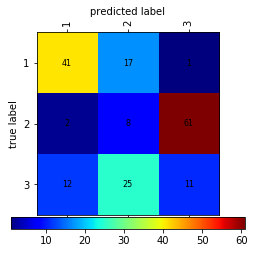

In [26]:
import sklearn.metrics as skmetrics

labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=df['class'], y_pred=df['prediction'])
plot_confusion_matrix(C, labels_names)

print(skmetrics.classification_report(y_true=df['class'], y_pred=df['prediction']))

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Define a rule that uses the most discriminative feature to classify the wine observations ?</p>

In [27]:
df.groupby(['class'])['flavanoids'].describe()

pred = []

for row in df['flavanoids']:
    if row > 2.3:
        pred.append(1);
    elif row > 1.22 :
        pred.append(2);    
    else:
        pred.append(3)
# The prediction column is updated to the dataframe
df['prediction'] = pred

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Compute the confusion matrix of the resulting rule-based system ?</p>

              precision    recall  f1-score   support

           1       0.75      0.98      0.85        59
           2       0.87      0.68      0.76        71
           3       0.91      0.88      0.89        48

   micro avg       0.83      0.83      0.83       178
   macro avg       0.85      0.84      0.84       178
weighted avg       0.84      0.83      0.83       178



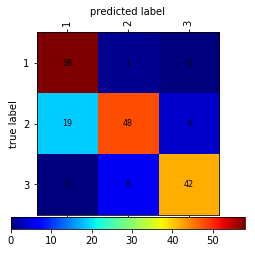

In [28]:

labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=df['class'], y_pred=df['prediction'])
plot_confusion_matrix(C, labels_names)
print(skmetrics.classification_report(y_true=df['class'], y_pred=df['prediction']))

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Compute the precision, the recall and the f1-score of the system for a given class using the values of the confusion matrix ?</p>

## 9. Try a simple machine learning classifier

### Standardization
As you can see from the df.describe() above, the range values for each column in our dataset varies a lot. Depending on the model you want to use, that can be a big problem.

The model we'll use here is k-Nearest Neighbor with the Euclidean distance. When using the Euclidean distance, it is important to think about how to preprocess your data.

For example, look at the 'magnesium' and 'total phenols' columns. The standard deviation for magnesium is 14 while for total phenols it is 0.62. This means that the data are more spread out on the magnesium axis compared to the phenols axis. And if we use raw values to compute distances, the magnesium axis will be much more important than the phenols axis, but this importance will just be due to the (arbitrary) scales that we used to measure magnesium and phenols.

In [29]:
print(df['magnesium'].describe())
print(df['total phenols'].describe())

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64
count    178.000000
mean       2.295112
std        0.625851
min        0.980000
25%        1.742500
50%        2.355000
75%        2.800000
max        3.880000
Name: total phenols, dtype: float64


To make the distances less dependent on particular scales, we can standardize our data by making sure each column has 0 mean and unit variance, using [sklearn.preprocessing.scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) or by computing the normalization ourselves.

In [30]:
from sklearn.preprocessing import scale

# all variables of the dataset with normalization
#X = scale(df[colnames[1:]])

# some selected variables without normalization
X = df[['magnesium', 'total phenols']].values

y = df['class'].values

### Preparing the datasets for cross-validation: Train/test split
To build and evaluate a machine learning model, we need to split our data into training and testing sets. Scikit-learn has a [cross_validation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) module that helps with this task.

In [31]:
from sklearn.model_selection import train_test_split
# train and test are indices arrays containing the indices of train/test samples
train, test = train_test_split(
    np.arange(X.shape[0]), test_size=0.4, random_state=42 # we fix a random state for reproducibility
)

print("train shape : ", train.shape)
print("test shape  : ", test.shape)

train shape :  (106,)
test shape  :  (72,)


### Classifying the wine data
We will use a k-Nearest Neighbor classifier. This classifier will classify a new sample by assigning it the class of its nearest neighbor (for k=1). It computes the distance between the new sample and all the samples in the training set, find the nearest training sample and then use the class of the nearest neighbor to classify the new sample.

The [scipy.spatial.distance](http://docs.scipy.org/doc/scipy/reference/spatial.distance.html) module helps with distance computation

In [32]:
def norm(x):
    return np.sqrt(x.dot(x))

def euclidean_distance(x1, x2):
    """Euclidean distance"""
    return norm(x1 - x2)

def distances(X_train, x):
    """
    Returns a vector containing the distance between x and each
    sample in X_train
    """
    n_train = X_train.shape[0]
    return np.array([euclidean_distance(X_train[i,:], x) for i in range(n_train)])

def nn_classify_single(X_train, y_train, X):
    """
    Nearest neighbor classifier. Returns the class of the nearest training vector
    """
    dists = distances(X_train, X)
    closest = np.argmin(dists)
    return y_train[closest]

def nn_classify(X_train, y_train, X):
    """
    Assign to each row in X the class of its nearest neighbor in X_train
    """
    y_pred = np.zeros(X.shape[0], dtype=np.int)
    for i in range(X.shape[0]):
        y_pred[i] = nn_classify_single(X_train, y_train, X[i])
    return y_pred

In [33]:
y_test_pred = nn_classify(X[train], y[train], X[test])
print("y_true : ", y[test])
print("y_pred : ", y_test_pred)

y_true :  [1 1 3 1 2 1 2 3 2 3 1 3 1 2 1 2 2 2 1 2 1 2 2 3 3 3 2 2 2 1 1 2 3 1 1 1 3
 3 2 3 1 2 2 2 3 1 2 2 3 1 2 1 1 3 3 2 2 1 2 1 3 2 2 3 1 1 1 3 1 1 2 3]
y_pred :  [3 1 3 1 2 1 2 1 2 3 2 3 2 2 1 3 3 2 2 2 1 2 3 2 2 2 1 1 2 3 2 3 1 1 3 2 2
 3 2 3 1 2 2 1 3 2 3 1 2 2 2 1 1 3 2 3 2 1 3 2 2 2 2 2 1 2 2 3 1 2 2 3]


              precision    recall  f1-score   support

           1       0.67      0.46      0.55        26
           2       0.46      0.59      0.52        27
           3       0.47      0.47      0.47        19

   micro avg       0.51      0.51      0.51        72
   macro avg       0.53      0.51      0.51        72
weighted avg       0.54      0.51      0.52        72



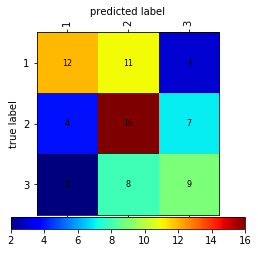

In [34]:
labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=y[test], y_pred=y_test_pred)
plot_confusion_matrix(C, labels_names)

print(skmetrics.classification_report(y_true=y[test], y_pred=y_test_pred))

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Now, normalize (scale) the columns of your data matrix and re-run the classification. What do you observe ?</p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Above, we implemented a basic nearest neighbor classifier (k=1). Modify it so that it is a k nearest neighbor classifier. Evaluate it for k=3, k=5 and k=10. Does increasing k help ? Is there a limit after which increasing k is useless ? Why ?</p>

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: In our example, we only used two features (magnesium and total phenols). Try classifying with all the features and compare the performance.</p>